# Requerimientos tecnicos

Para ejecutar el codigo es necesario tener instalado Python version 2.7 o 3.6 asi como distintos paquetes o librerias. Se recomienda tener instalada la Suite Anaconda donde se entrontraran preinstalados la mayoria de los paquetes y librerias que son necesarios.

# Modelo de Clasificacion

Para nuestro modelo hemos obtenido una base de datos de una entidad financiera con 450.000 clientes con informacion y  productos de cada uno de estos. Desde si el saldo que tiene en cuenta , fondo de inversion o plan de pension,  el recorrido comercial del cliente a ojos de la entidad financiera, si esta o no carteriazo o si tiene o no tiene productos como seguros, nominas, tarjetas o recibos domiciliados. Nuestro modelo consiste en determinar si un cliente,  con una serie de condiciones o Inputs tiene o no tiene el Seguro de hogar contratado.

La informacion detallada del data set se encuentra dentro de una de las carpetas de este repositorio con el nombre de Data-Codes

    


# Comenzamos.
Iremos cargando las librerias que vamos a usar para nuestro modelo segun las vayamos necesitando. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

Leemos la base de datos y asociamos a la variable df el data set

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

Para ver con que base de datos vamos a trabajar,  realizamos unas primeras observaciones del data set como las primeras filas ,  la forma del data set ,  las columnas, la cantidada de datos disponibles, las columnas y el tipo de dato de cada columna.
    - head - shape  - size - dtype  - columns
    
Finalmente realizaremos un primer ejercicio de visualizacion que nos puede ayudar a enteder de un primer vistazo el data set.

In [3]:
# Mediante este metodo vemos las 5 primeras filas del data set
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [4]:
# La base de datos consta de 451.374 filas y 30 columnas
df.shape

(451374, 30)

In [5]:
# Contiene 13.541.220 datos 
df.size

13541220

In [6]:
# 30 columnas que alojan distinta informacion.
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [7]:
# El tipo de dato que contiene las columnas.  
# 10 Columnas tipo Objeto 
#  7 Columnas tipo float  
# 13 columnas tipo int64
df.dtypes 

cliente                 int64
saldo_captacion       float64
esta_carterizado       object
cliente_bbp            object
tipo_gestor            object
gestor                float64
cartera_patron         object
codigo_cartera        float64
digital_3_meses        object
camino_digital         object
saldo_financiacion    float64
saldo_ffii            float64
saldo_plp             float64
lp_dom_ingresos         int64
lp_tjta_cto             int64
lp_tjt_rev              int64
lp_rbos                 int64
lp_of_int               int64
marca_bp               object
marca_ccte             object
edad                  float64
seg_valor              object
seg_recorrido          object
dz                      int64
oficina                 int64
lp_seg_vida             int64
lp_seg_acc              int64
lp_seg_salud            int64
lp_seg_hogar            int64
lp_seg_auto             int64
dtype: object

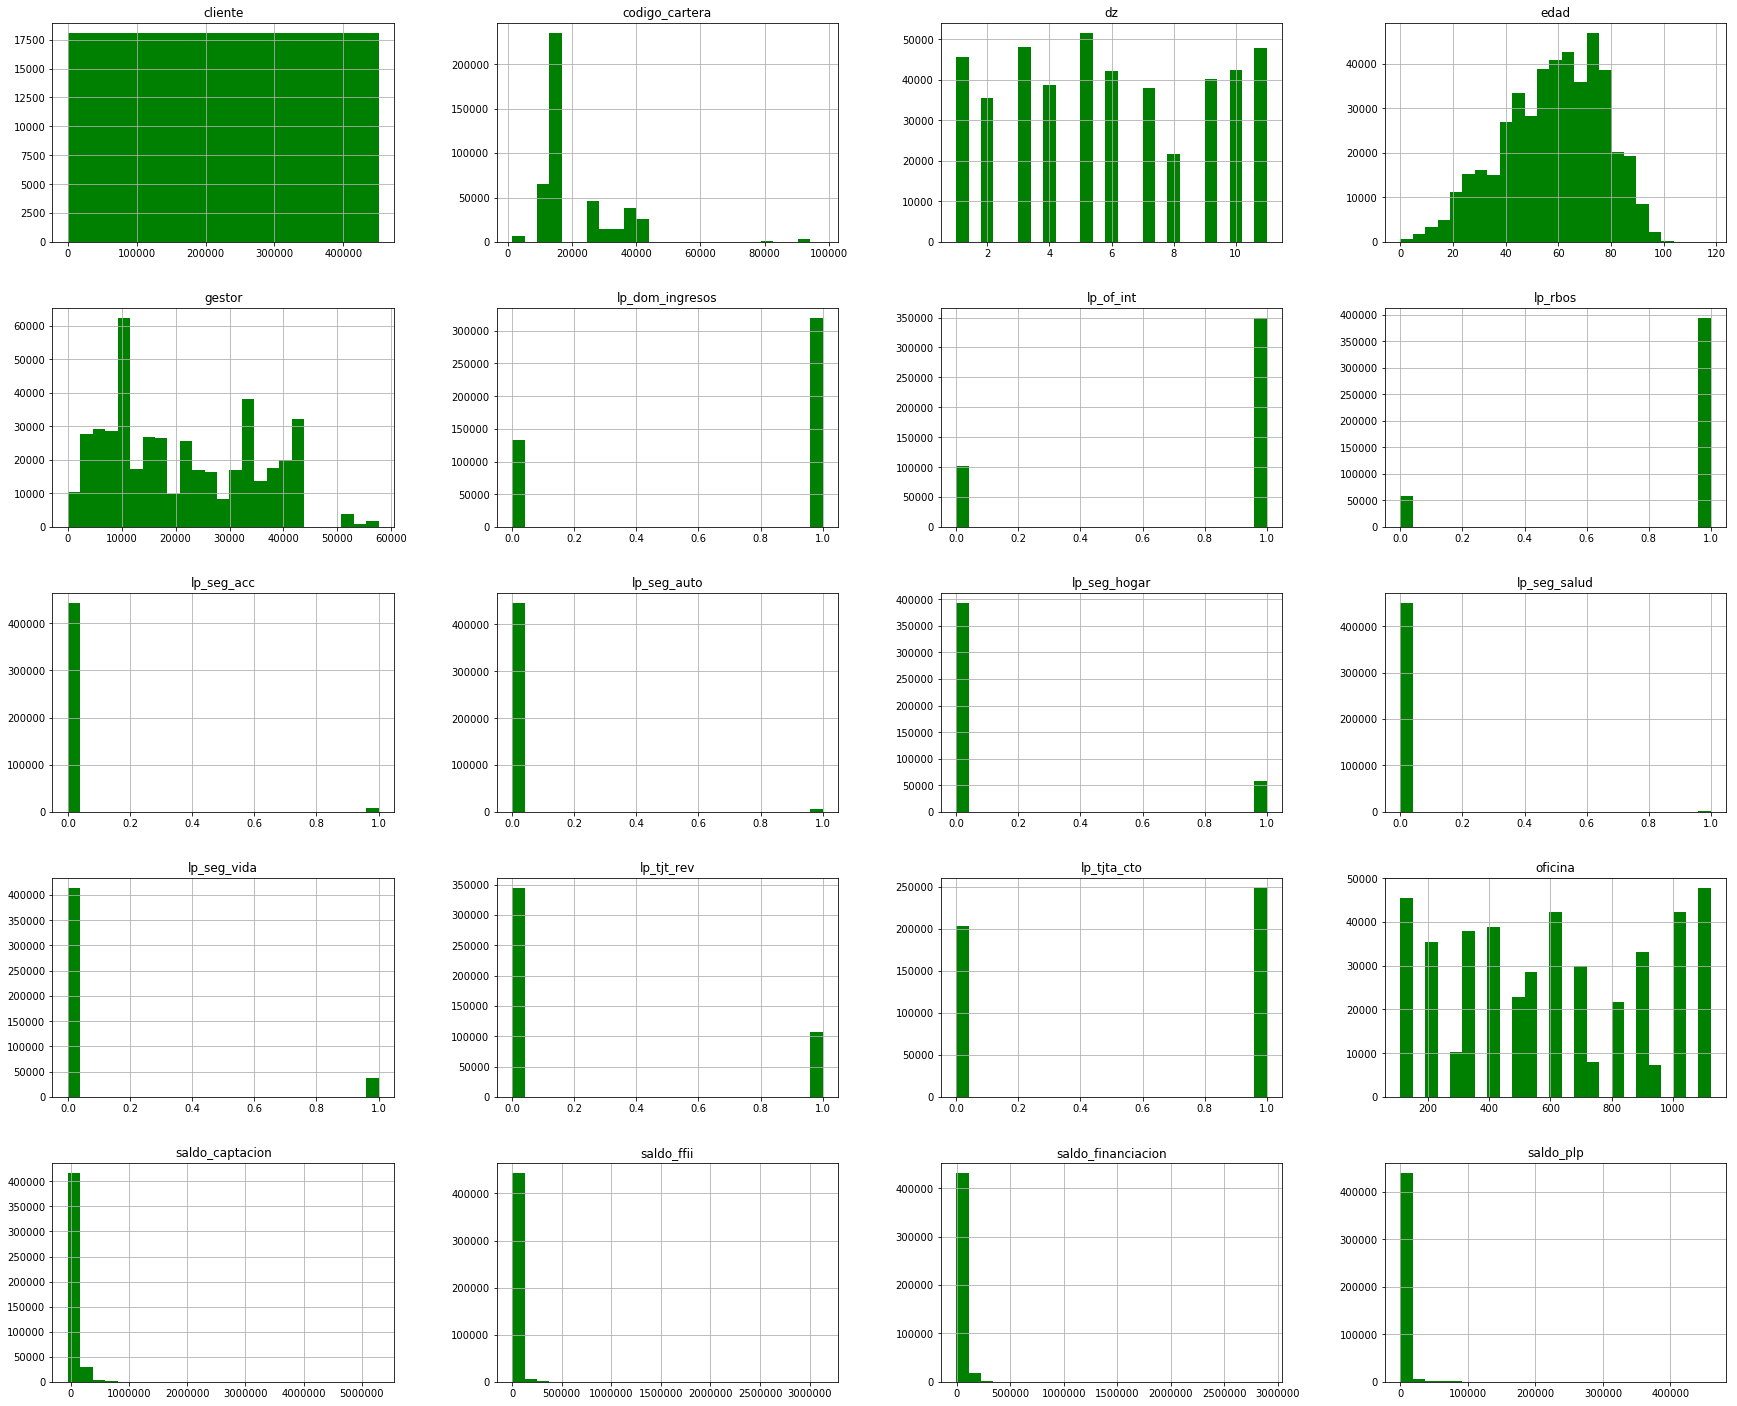

In [8]:
# Visualizamos todas las columnas numericas o categorias.  No se incluyen las columnas de tipo objeto.
df.hist(figsize=(30,25), color = 'G', bins = 25)
plt.show()

## Iniciamos la construccion de este primer modelo de clasificacion
    - Como Target escogemos el Seguro de hogar.
    - Como inputs cogemos si tiene nomina y el saldo de ahorro captacion.
En primer lugar y sin entrar en profundidad, vemos distintas caracteristicas de cada una de las variables Target e Input.  Posteriormente hacemos una primera aproximacion a una descripcion estadistica de la variables.

Observamos que las variables lp_ingresos (input) y lp_seguro hogar (target), son variables categorias etiquetadas con 0 - No tiene el producto y 1-Tiene el producto.  La varible saldo captacion (input) es una variable numerica que informa del dinero que tiene el cliente.

La descripcion estadistica unicamente se realiza de la variable numerica Saldo Captacion ya que hacerlo con las otras dos variables categoricas no tiene sentido y no aporta nada.

En esta descipcion vemos el maximo, minimo , medias y cuartiles. El minimo arroja un saldo negativo de algun cliente mientras que el maximo supera los 5mm de euros.

In [9]:
print('================================================')
print('Nº Valores saldo captacion')
print(pd.value_counts(dfm0['saldo_captacion']).head(3))
print('================================================')
print('% Valores lp_dom_ingresos')
print(pd.value_counts(dfm0['lp_dom_ingresos'], normalize = True))
print('================================================')
print(' % Valores lp_seg_hogar')
print(pd.value_counts(dfm0['lp_seg_hogar'], normalize = True))
print('================================================')

Nº Valores saldo captacion


NameError: name 'dfm0' is not defined

In [ ]:
# Descripcion estadistica de la variable numerica
df['saldo_captacion'].describe()

### MODELO

In [10]:
# Asignamos Target e Inputs a nuestro modelo
datos_numericos = df.select_dtypes('number')
X = datos_numericos.drop(['lp_seg_hogar'],1)
y= df['lp_seg_hogar']
print('Nº Datos X =', X.size)
print('Dimension X =', X.shape)
print('='*26)
print('Nº Datos y =', y.size)
print('Dimersion y =', y.shape)

Nº Datos X = 8576106
Dimension X = (451374, 19)
Nº Datos y = 451374
Dimersion y = (451374,)


In [11]:
# Cargamos la libreria del modelo de clasificacion que hemos eligido inicialmente.  Regresion Logistica.
from sklearn.linear_model import LogisticRegression

In [12]:
# Creamos la instancia del modelo de clasificacion
modelo0 = LogisticRegression()

In [13]:
# Ajustamos el modelo
modelo0.fit(X,y)

LogisticRegression()

In [14]:
# Hacemos las primeras predicciones
predicciones_modelo0 = modelo0.predict(X)
predicciones_modelo0

array([1, 1, 1, ..., 0, 0, 0])

### ENTRENAMIENTO Train-Test Split 

Vamos a dividir el data set en dos grupos. Uno primero de entrenamiento y un segundo de validacion.  Este segundo grupo no se utiliza durante el entrenamiento.  Dado que nuestra base de datos es grande, decidimos dar un peso del 80 % al grupo de entrenamiento y un 20% al grupo de validacion.


In [15]:
# Cargamos la libreria para poder entrenar nuestro modelo
from sklearn.model_selection import train_test_split


In [16]:
# Creamos dos grupos con Input y etiquetas  
# Asignamos la proporcion de 80-20 para el train y el test
test_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [17]:
# Ajustamos y entrenamos solo con el grupo de Entreamiento
modelo0.fit(X_train,y_train)

LogisticRegression()

In [18]:
#  Haemos las prediciones de todo el X_test
predicciones_train_modelo0 = modelo0.predict(X_test)
predicciones_train_modelo0 

array([0, 0, 0, ..., 0, 0, 0])

### Utilizacion de Metricas

Una vez realizado nuestro modelo0 inicial queremos saber como de exacto es para lo cual utilizamos distintas metricas que nos daran datos con los podremos decidir si hay que continuar gestionando el modelo o es un modelo bueno. 

Utilizaremos las metricas mas comunes para los metodos de clasificacion.
    - accuracy_score - precision_score - recall_score - f1_score - roc_curve

Como primer paso y antes de visualizar el resultado de las metricas, imprimimos la matriz de confusion para pode entender luego los resultados


In [19]:
# Cargamos librerias de metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[77913   613]
 [11330   419]]


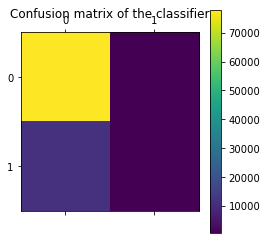

In [20]:
# Imprimimos la matriz de confusion para ver los datos iniciales de verdaderos positivos y negativos
matriz_confusion_modelo0 = confusion_matrix(y_test,modelo0.predict(X_test))
print(matriz_confusion_modelo0)
pl.matshow(matriz_confusion_modelo0)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


In [22]:
# RESULTADOS MODELO_0
print('RESULTADOS MODELO_0')
print('====================================')
accuracy_score_modelo_0 = print ('accuracy_score = ', accuracy_score(y_test,modelo0.predict(X_test)))
print('====================================')
precision_modelo_0 = print('precision =', precision_score(y_test,modelo0.predict(X_test)))
print('====================================')
recall_score_modelo_0 = print('recall =', recall_score(y_test,modelo0.predict(X_test)))
print('====================================')
f1_score_modelo_0 = print('f1_score =', f1_score(y_test,modelo0.predict(X_test)))
print('====================================')
roc_auc_score_modelo_0 = print('roc_auc_score =', roc_auc_score(y_test,modelo0.predict_proba(X_test)[:,1]))
print('====================================')


RESULTADOS MODELO_0
accuracy_score =  0.8677042370534478
precision = 0.4060077519379845
recall = 0.035662609583794365
f1_score = 0.06556607464204679
roc_auc_score = 0.6540263450596084


### Conclusiones

Hemos construido el primer modelo de clasificacion de forma directa sin realizar modificaciones o cambio en parametros, desbalanceos, ajustes...etc etc
Los resultados no son buenos en ninguna de las metricas. Es necesario evolucionar el modelo.
#### __Evolucionamos el modelo normalizando las variables numericas que sirven de inputs.__ 

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
df_datos_numericos = data = df.select_dtypes('number')

In [30]:
columnas_datos_numericos = df_datos_numericos.columns

In [31]:
df_normalizado = scaler.fit_transform(df_datos_numericos)

In [32]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [33]:
df_normalizado.head(2)

,cliente,saldo_captacion,gestor,codigo_cartera,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,0.000000,0.258207,0.316956,0.140366,0.001689,0.415566,0.031101,1.0,1.0,1.0,1.0,1.0,0.584746,0.1,0.098619,0.0,0.0,0.0,1.0,0.0
1,0.000002,0.223408,0.316956,0.140366,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,1.0,0.686441,0.1,0.098619,0.0,0.0,0.0,0.0,0.0


In [34]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y = df_normalizado['lp_seg_hogar']
print('Nº Datos X =', X.size)
print('Dimension X =', X.shape)
print('='*26)
print('Nº Datos y =', y.size)
print('Dimersion y =', y.shape)

Nº Datos X = 8576106
Dimension X = (451374, 19)
Nº Datos y = 451374
Dimersion y = (451374,)


In [35]:
modelo1 = LogisticRegression(solver = 'newton-cg')

In [36]:
modelo1.fit(X,y)

LogisticRegression(solver='newton-cg')

In [37]:
modelo1.predict(X)

array([1., 0., 0., ..., 0., 0., 0.])

In [38]:
test_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [39]:
modelo1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [40]:
modelo1.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
modelo1.predict_proba(X_test)[:, 1]

array([0.10519022, 0.17919336, 0.24050696, ..., 0.15976316, 0.40287131,
       0.03077135])

MATRIZ_CONFUSION_MODELO_01
[[77794   732]
 [10928   821]]


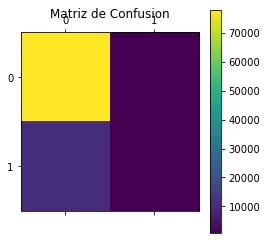

In [42]:
# Imprimimos matriz de confusion para ver los datos iniciales y luego sacar las metricas
matriz_confusion_modelo1 = confusion_matrix(y_test,modelo1.predict(X_test))
print('MATRIZ_CONFUSION_MODELO_01')
print(matriz_confusion_modelo1)
pl.matshow(confusion_matrix(y_test,modelo1.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [44]:
# RESULTADOS MODELO_1
print('RESULTADOS MODELO_1')
print('====================================')
accuracy_score_modelo_1 = print ('accuracy_score = ',accuracy_score(y_test,modelo1.predict(X_test)))
print('====================================')
precision_modelo_1 = print('precision =', precision_score(y_test,modelo1.predict(X_test)))
print('====================================')
recall_score_modelo_1 = print('recall =', recall_score(y_test,modelo1.predict(X_test)))
print('====================================')
f1_score_modelo_1 = print('f1_score =', f1_score(y_test,modelo1.predict(X_test)))
print('====================================')
roc_auc_score_modelo_1 = print('roc_auc_score =', roc_auc_score(y_test,modelo1.predict_proba(X_test)[:,1]))
print('====================================')


RESULTADOS MODELO_1
accuracy_score =  0.8708391027416228
precision = 0.5286542176432711
recall = 0.06987828751383096
f1_score = 0.12344008419786498
roc_auc_score = 0.7810038633192866


roc_auc_score = 0.7810038633192866


Text(0, 0.5, 'tpr')

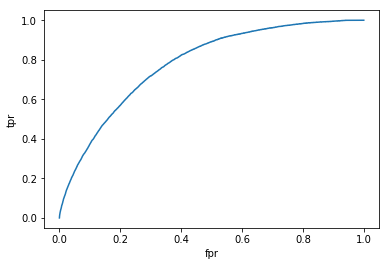

In [45]:
print('roc_auc_score =', roc_auc_score(y_test,modelo1.predict_proba(X_test)[:, 1]))
fpr, tpr, threshold = roc_curve(y_test,modelo1.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

### COMPARATIVAS RESULTADOS

### __accuracy_score__ ================
    - Modelo1 = 0.8708391027416228
    - Modelo0 = 0.8677042370534478
### __precision__ =====================
    - Modelo1 = 0.5286542176432711
    - Modelo0 = 0.4060077519379845
### __recall__ ========================
    - Modelo1 = 0.06987828751383096
    - Modelo0 = 0.035662609583794365
### __f1__ ============================
    - Modelo1 = 0.12344008419786498
    - Modelo0 = 0.06556607464204679
### __roc_auc_score__ =================
    - Modelo1 = 0.7810038633192866
    - Modelo0 = 0.6540263450596084

